Extraction complete!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ MB
MAE: 29582.49502312646
R2 Score: 0.7551423617489046


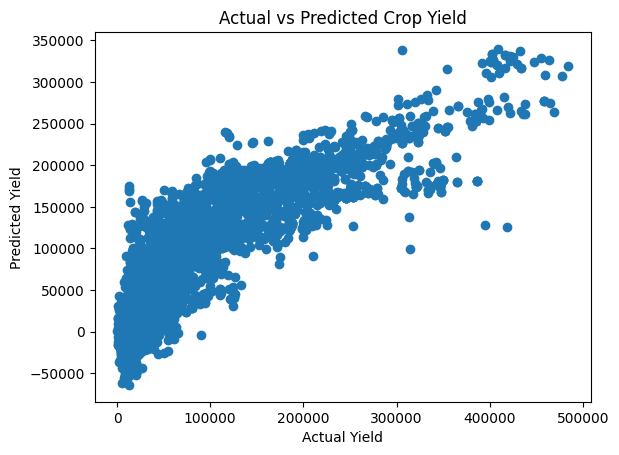

,0
Year,1131.339518
average_rain_fall_mm_per_year,-6.256055
pesticides_tonnes,0.020816
avg_temp,21.370854
Area_Albania,-2260.117108
Area_Algeria,-6828.797915
Area_Angola,-46159.070622
Area_Argentina,10457.229872
Area_Armenia,-13961.680404
Area_Australia,44588.959856


In [17]:
import zipfile

with zipfile.ZipFile('/content/archive (1).zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')

print("Extraction complete!")
import os
os.listdir('/content/')
import pandas as pd

data = pd.read_csv('/content/yield_df.csv')
data.head()
data = pd.read_csv('/content/yield_df.csv')
data.head()
data.info()
data.isnull().sum()
data.fillna(data.mean(numeric_only=True), inplace=True)

data = data.drop("Unnamed: 0", axis=1)
X = data.drop("hg/ha_yield", axis=1)
y = data["hg/ha_yield"]
X = pd.get_dummies(X)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
from sklearn.metrics import mean_absolute_error, r2_score

print("MAE:", mean_absolute_error(y_test, predictions))
print("R2 Score:", r2_score(y_test, predictions))
import matplotlib.pyplot as plt

plt.scatter(y_test, predictions)
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("Actual vs Predicted Crop Yield")
plt.show()
coefficients = pd.DataFrame(model.coef_, X.columns)
coefficients.head(10)












